In [9]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from pprint import pprint
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
pd= pd.read_csv("output_data/cities.csv")

pd.head()


,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [3]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
#         if len(cities)<100:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

In [4]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [5]:
record_counter = 0

set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | port hueneme
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f357598b226749014e0b1d73d54368b1
Processing record 2 of set 0 | vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f357598b226749014e0b1d73d54368b1
Processing record 3 of set 0 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f357598b226749014e0b1d73d54368b1
Processing record 4 of set 0 | sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f357598b226749014e0b1d73d54368b1
Processing record 5 of set 0 | roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f357598b226749014e0b1d73d54368b1
Processing record 6 of set 0 | la baule-escoublac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f357598b226749014e0b1d73d54368b1
Processing record 7 of set 0 | punta arenas
http://api.openweathermap.org/

In [11]:
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Temp          531
Lat           531
Lng           531
Wind Speed    531
dtype: int64

In [12]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,port hueneme,90,US,1601266060,82,68.00,34.15,-119.20,3.36
1,vardo,75,NO,1601265513,81,44.60,70.37,31.11,13.87
2,vaini,20,TO,1601266061,69,78.80,-21.20,-175.20,8.05
3,sisimiut,41,GL,1601266061,92,30.99,66.94,-53.67,7.76
4,roald,95,NO,1601266061,93,54.00,62.58,6.13,1.12


In [17]:
cities_list = zip(new_cities,cloudiness,country,date,humidity,temp,lat,lng)
# Set variable for output file
output_file = os.path.join( 'output_data', 'cities.csv')
#  Open the output file
with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)

In [18]:
date =datetime.datetime.fromtimestamp(
        int(weather_data['Date'][0])
    ).strftime('%m/%d/%Y')

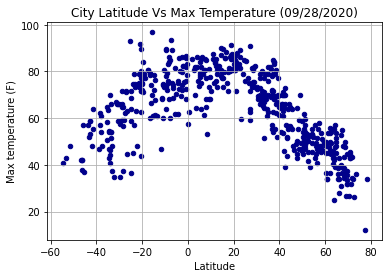

In [36]:
# Latitude Vs Temperature Plot

weather_data.plot(kind='scatter', x='Lat', y='Temp', c='DarkBlue')
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()

plt.savefig("Images/LatitudeVsTemperature.png")

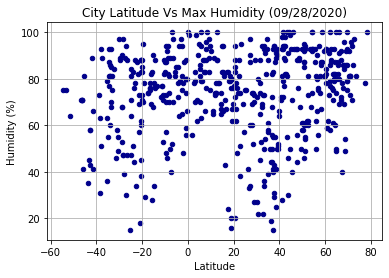

In [35]:

weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='DarkBlue')
plt.title('City Latitude Vs Max Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("Images/LatitudeVsHumidity.png")

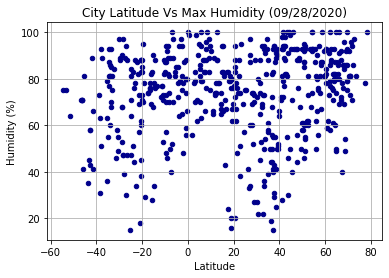

In [34]:

weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='DarkBlue')
plt.title('City Latitude Vs Max Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("Images/LatitudeVsCloudiness.png")

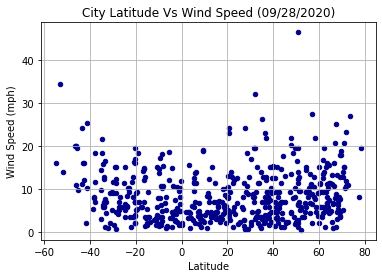

In [33]:

weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='DarkBlue')
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("Images/LatitudeVsWindSpeed.png")